![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [13]:
data.tail()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0
49999,id_4824,Milan,['Spanish'],4827.0,$$ - $$$,260.0,"[['Average', 'Nice an informal'], ['01/31/2016...",/Restaurant_Review-g187849-d1109020-Reviews-Ta...,d1109020,1,3.0


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [14]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
24475,id_1593,Stockholm,NaN,1596.0,NaN,3.0,"[['Genuine Korean food'], ['10/18/2017']]",/Restaurant_Review-g189852-d12946675-Reviews-K...,d12946675,1,3.5
7275,id_7275,Stockholm,"['Mediterranean', 'Italian', 'Pizza', 'Vegetar...",549.0,$$ - $$$,290.0,"[[""Great food, didn't like staff"", 'Vapiano Vi...",/Restaurant_Review-g189852-d4590820-Reviews-Va...,d4590820,0,0.0
3915,id_3915,Barcelona,['Chinese'],5878.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187497-d3398307-Reviews-Ch...,d3398307,0,0.0
11270,id_6,Amsterdam,"['French', 'International', 'Mediterranean', '...",7.0,$$ - $$$,1455.0,"[['40th Birthday with my Family', 'One of the ...",/Restaurant_Review-g188590-d1014732-Reviews-Za...,d1014732,1,4.5
48305,id_1260,Prague,['Chinese'],1261.0,$,17.0,"[['Great beer range.', 'Brilliant!'], ['07/16/...",/Restaurant_Review-g274707-d10252892-Reviews-P...,d10252892,1,4.0


In [15]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [16]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [17]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [18]:
# посмотрим, какой медианный рейтинг у нанных рэнкингов
data[data['Number_of_Reviews_isNAN']==1]['Ranking'].median()

# хм, Акбар смотрел ссылки по таким нанам
# Checking the URLs of restaraunts with no number of reviews.
# data.query('`Number of Reviews NAN` == 1')['URL_TA'].tolist()[0:11]

# и выяснил, что это неизвестные маленькие рестораны и отзывов еще нет... и заполнил нулями

3503.0

In [19]:
# какое медианное значение отзывов у рэнкинга более 3503
data[data['Ranking']>3503]['Number of Reviews'].median()

17.0

In [20]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...

# заполним значением 17
data['Number of Reviews'] = data['Number of Reviews'].fillna(17)

In [21]:
# Акбар
# Creating a new feature.
# data['Reviews to Ranking Ratio'] = data['Number of Reviews'] / data['Ranking']
# data['Reviews to Ranking Ratio']

In [22]:
data['Reviews to Ranking Ratio'] = data['Ranking'] / data['Number of Reviews']
data['Reviews to Ranking Ratio']

0        3240.750000
1           1.092784
2          28.928571
3           8.262376
4           0.228395
            ...     
49995       6.329114
49996      11.699262
49997     413.000000
49998       9.157143
49999      18.565385
Name: Reviews to Ranking Ratio, Length: 50000, dtype: float64

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [23]:
data.nunique(dropna=False)

Restaurant_id               13094
City                           31
Cuisine Style               10732
Ranking                     12975
Price Range                     4
Number of Reviews            1573
Reviews                     41858
URL_TA                      49963
ID_TA                       49963
sample                          2
Rating                         10
Number_of_Reviews_isNAN         2
Reviews to Ranking Ratio    43840
dtype: int64

In [24]:
# Проверим, сколько у нас нанов
data.isna().sum()

Restaurant_id                   0
City                            0
Cuisine Style               11590
Ranking                         0
Price Range                 17361
Number of Reviews               0
Reviews                         2
URL_TA                          0
ID_TA                           0
sample                          0
Rating                          0
Number_of_Reviews_isNAN         0
Reviews to Ranking Ratio        0
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [25]:
# создаем словарь, куда запишем город и код города, сортированный по алфавиту и по порядку от единицы
dict_city = {}
for i, v in enumerate(sorted(list(data['City'].unique()))):
    #print(i, v)
    dict_city[v] = i+1
dict_city

{'Amsterdam': 1,
 'Athens': 2,
 'Barcelona': 3,
 'Berlin': 4,
 'Bratislava': 5,
 'Brussels': 6,
 'Budapest': 7,
 'Copenhagen': 8,
 'Dublin': 9,
 'Edinburgh': 10,
 'Geneva': 11,
 'Hamburg': 12,
 'Helsinki': 13,
 'Krakow': 14,
 'Lisbon': 15,
 'Ljubljana': 16,
 'London': 17,
 'Luxembourg': 18,
 'Lyon': 19,
 'Madrid': 20,
 'Milan': 21,
 'Munich': 22,
 'Oporto': 23,
 'Oslo': 24,
 'Paris': 25,
 'Prague': 26,
 'Rome': 27,
 'Stockholm': 28,
 'Vienna': 29,
 'Warsaw': 30,
 'Zurich': 31}

In [26]:
# Ничего не получилось с парсингом, в ручную добываем с вики сведения о:
# номер пп,
# площадь(км2),
# население(тыс) ,
# климат: 
#      1 умер конт,
#      2 умерен,
#      3 умерен морской и морской,
#      4 средиземноморс,
#      5 субтроп,
# туристы(млн)
dict_city_full = {
 'Amsterdam': [1,  219,  873, 2, 10  ],
 'Athens':    [2,  412,  664, 5, 14  ],
 'Barcelona': [3,  101, 1637, 4, 16  ],
 'Berlin':    [4,  892, 3645, 2, 13.4],
 'Bratislava':[5,  368,  438, 1,  1.4],
 'Brussels':  [6,   33,  179, 3,  8.5],
 'Budapest':  [7,  525, 1752, 1,  2.7],
 'Copenhagen':[8,   86,  616, 3,  8.8],
 'Dublin':    [9,  318, 1173, 3,  5  ],
 'Edinburgh': [10, 118,  488, 3, 13  ],
 'Geneva':    [11,  16,  201, 2, 10  ],
 'Hamburg':   [12, 755, 1841, 3,  4  ],
 'Helsinki':  [13, 715,  655, 3,  7  ],
 'Krakow':    [14, 327,  770, 2, 15  ],
 'Lisbon':    [15, 100,  506, 3,  9  ],
 'Ljubljana': [16, 164,  284, 1,  1.3],
 'London':    [17,1572, 8908, 3, 19  ],
 'Luxembourg':[18,2586,  602, 2,  0.5],
 'Lyon':      [19,  48,  507, 1,  6  ],
 'Madrid':    [20, 607, 3266, 1,  9  ],
 'Milan':     [21, 182, 1379, 5, 11  ],
 'Munich':    [22, 311, 1472, 1, 20  ], # примерно между берлином 30 и гамбургом 13 на 2016год
 'Oporto':    [23,  42,  238, 3,  7  ],
 'Oslo':      [24, 454,  673, 3, 10  ],
 'Paris':     [25, 105, 2148, 1, 50  ],
 'Prague':    [26, 500, 1301, 1,  6.6],
 'Rome':      [27,1287, 2871, 4, 40  ],
 'Stockholm': [28, 188,  962, 3, 18  ],
 'Vienna':    [29, 415, 1897, 2,  6  ],
 'Warsaw':    [30, 517, 1791, 2, 10  ],
 'Zurich':    [31,  92,  429, 2, 10  ]} # не нашел конкретно

# что за запись
# https://coderoad.ru/20625582/Как-справиться-с-SettingWithCopyWarning-в-Pandas
for i in list(dict_city_full.keys()):
    data.loc[data.City == i, 'city_id'] = data['City'].apply(lambda x: int(dict_city_full[i][0]))
    data.loc[data.City == i, 'city_area'] = data['City'].apply(lambda x: dict_city_full[i][1])
    data.loc[data.City == i, 'city_popul'] = data['City'].apply(lambda x: dict_city_full[i][2])
    data.loc[data.City == i, 'city_climate'] = data['City'].apply(lambda x: dict_city_full[i][3])
    data.loc[data.City == i, 'city_tourism'] = data['City'].apply(lambda x: dict_city_full[i][4])
    
# почему то тип флоатом становится
data[['city_id', 'city_area', 'city_popul', 'city_climate']] = data[['city_id', 'city_area', 'city_popul', 'city_climate']].astype('int64')
# data[['city_area', 'city_popul', 'city_climate']] = data[['city_area', 'city_popul', 'city_climate']].astype('int64')

In [27]:
# получаем словарь с городами и количеством этого города
from collections import Counter

def dict_city_count(df, column):
    count=Counter()
    for i in range(len(df)):
            count[df.iloc[i][column]] += 1
    return count

dict_city_count = dict(dict_city_count(data, 'City'))

In [28]:
# мы посмотрели на средние ренкинги по городам и они несколько коррелируют с количеством этих городов,
# попробуем ввести признак рэнкинг/на количество города
# def rank_div_count_city(df, column)

# что за запись
# https://coderoad.ru/20625582/Как-справиться-с-SettingWithCopyWarning-в-Pandas
for i in list(dict_city_count.keys()):
    data.loc[data.City == i, 'rank_div_count_city'] = data['Ranking'].apply(lambda x: x/dict_city_count[i])  

# после добавления, колонка стала главной для определения 

# Number of Reviews Количество отзывов

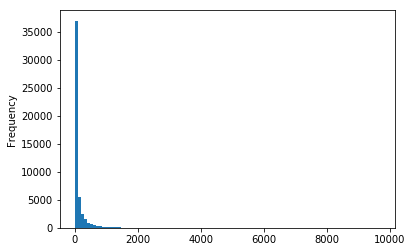

In [29]:
data['Number of Reviews'].plot(kind = 'hist', bins=100)

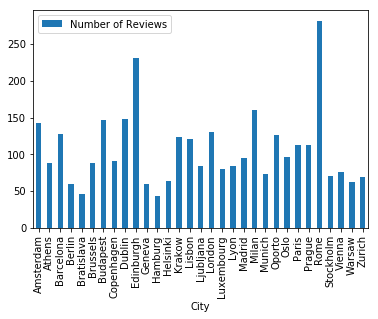

In [30]:
data.pivot_table(values = ['Number of Reviews'], 
               index = 'City', 
               aggfunc = 'mean').plot(kind = 'bar')

In [31]:
data.loc[data.City == 'London']['Number of Reviews'].sum()

940995.0

In [32]:
dict_city_full['London'][1]*1000/data.loc[data.City == 'London']['Number of Reviews'].sum()

1.6705721071844164

In [33]:
# получаем словарь с городами и количеством отзывов в этом городе
#data5 = data.iloc[0:50].copy()

from collections import Counter

def dict_city_rev_count(df, column, calc_column):
    count=Counter()
    for i in range(len(df)):
        #print(i)
        #print('df.iloc[i][column] = {}'.format(df.iloc[i][column]))
        count[df.iloc[i][column]] += data.iloc[i][calc_column]
    return count

dict_city_rev_count = dict(dict_city_rev_count(data, 'City', 'Number of Reviews'))
dict_city_rev_count

{'Paris': 685774.0,
 'Helsinki': 29987.0,
 'Edinburgh': 172460.0,
 'London': 940995.0,
 'Bratislava': 17641.0,
 'Lisbon': 198234.0,
 'Budapest': 149828.0,
 'Stockholm': 72965.0,
 'Rome': 729527.0,
 'Milan': 433577.0,
 'Munich': 83814.0,
 'Hamburg': 50689.0,
 'Prague': 203428.0,
 'Vienna': 108715.0,
 'Dublin': 123484.0,
 'Barcelona': 433347.0,
 'Brussels': 115384.0,
 'Madrid': 361231.0,
 'Oslo': 46976.0,
 'Amsterdam': 194987.0,
 'Berlin': 160343.0,
 'Lyon': 94751.0,
 'Athens': 68700.0,
 'Warsaw': 57268.0,
 'Oporto': 81086.0,
 'Krakow': 68247.0,
 'Copenhagen': 74418.0,
 'Luxembourg': 21038.0,
 'Zurich': 47449.0,
 'Geneva': 34785.0,
 'Ljubljana': 18524.0}

In [34]:
dict_city_full

{'Amsterdam': [1, 219, 873, 2, 10],
 'Athens': [2, 412, 664, 5, 14],
 'Barcelona': [3, 101, 1637, 4, 16],
 'Berlin': [4, 892, 3645, 2, 13.4],
 'Bratislava': [5, 368, 438, 1, 1.4],
 'Brussels': [6, 33, 179, 3, 8.5],
 'Budapest': [7, 525, 1752, 1, 2.7],
 'Copenhagen': [8, 86, 616, 3, 8.8],
 'Dublin': [9, 318, 1173, 3, 5],
 'Edinburgh': [10, 118, 488, 3, 13],
 'Geneva': [11, 16, 201, 2, 10],
 'Hamburg': [12, 755, 1841, 3, 4],
 'Helsinki': [13, 715, 655, 3, 7],
 'Krakow': [14, 327, 770, 2, 15],
 'Lisbon': [15, 100, 506, 3, 9],
 'Ljubljana': [16, 164, 284, 1, 1.3],
 'London': [17, 1572, 8908, 3, 19],
 'Luxembourg': [18, 2586, 602, 2, 0.5],
 'Lyon': [19, 48, 507, 1, 6],
 'Madrid': [20, 607, 3266, 1, 9],
 'Milan': [21, 182, 1379, 5, 11],
 'Munich': [22, 311, 1472, 1, 20],
 'Oporto': [23, 42, 238, 3, 7],
 'Oslo': [24, 454, 673, 3, 10],
 'Paris': [25, 105, 2148, 1, 50],
 'Prague': [26, 500, 1301, 1, 6.6],
 'Rome': [27, 1287, 2871, 4, 40],
 'Stockholm': [28, 188, 962, 3, 18],
 'Vienna': [29, 415

In [35]:
# Посмотрим на количество отзывов от площади, населения и количества туристов

# Площадь города разделить на количество отзывов в городе и 

for i in list(dict_city_full.keys()):
    data.loc[data.City == i, 'area_div_NumRev'] = data['Number of Reviews'].apply(lambda x: x*(dict_city_full[i][1])/dict_city_rev_count[i]) 

for i in list(dict_city_full.keys()):
    data.loc[data.City == i, 'popul_div_NumRev'] = data['Number of Reviews'].apply(lambda x: x*(dict_city_full[i][2]*1000)/dict_city_rev_count[i])
    
for i in list(dict_city_full.keys()):
    data.loc[data.City == i, 'tourist_div_NumRev'] = data['Number of Reviews'].apply(lambda x: x*(dict_city_full[i][4]*1000000)/dict_city_rev_count[i]) 

In [36]:
data.sample(10)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Reviews to Ranking Ratio,city_id,city_area,city_popul,city_climate,city_tourism,rank_div_count_city,area_div_NumRev,popul_div_NumRev,tourist_div_NumRev
11539,id_240,Budapest,"['Bar', 'European', 'Pub', 'Eastern European',...",241.0,$$ - $$$,2988.0,"[['Delicious goulash', 'Very nice pub, good fo...",/Restaurant_Review-g274887-d1965935-Reviews-Fo...,d1965935,1,...,0.080656,7,525,1752,1,2.7,0.236043,10.470006,34939.904424,53845.743119
39109,id_10818,Paris,['Japanese'],10820.0,NaN,2.0,"[[], []]",/Restaurant_Review-g187147-d4582796-Reviews-Na...,d4582796,1,...,5410.000000,25,105,2148,1,50.0,1.771447,0.000306,6.264454,145.820635
25715,id_104,Krakow,"['Italian', 'Pizza', 'Mediterranean', 'Europea...",105.0,$$ - $$$,213.0,"[['Great place', 'Delicious'], ['12/30/2017', ...",/Restaurant_Review-g274772-d3569565-Reviews-An...,d3569565,1,...,0.492958,14,327,770,2,15.0,0.189531,1.020572,2403.182557,46815.244626
15959,id_12800,London,"['American', 'Fast Food']",12810.0,$,56.0,"[['The same everywhere', 'Good McDonald’s Loca...",/Restaurant_Review-g186338-d8083865-Reviews-Mc...,d8083865,1,...,228.750000,17,1572,8908,3,19.0,1.780898,0.093552,530.128215,1130.718017
42798,id_793,Edinburgh,"['Cafe', 'British', 'Scottish', 'Vegetarian Fr...",794.0,$$ - $$$,59.0,"[['Lovely lunch, good service', 'Tasty breakfa...",/Restaurant_Review-g186525-d12296380-Reviews-W...,d12296380,1,...,13.457627,10,118,488,3,13.0,1.065772,0.040369,166.948858,4447.408095
9206,id_9206,Lisbon,"['Asian', 'Chinese']",2811.0,$,39.0,"[['Delicious but small serving!', 'Not the bes...",/Restaurant_Review-g189158-d4358003-Reviews-Di...,d4358003,0,...,72.076923,15,100,506,3,9.0,1.706740,0.019674,99.549018,1770.634704
12505,id_216,Dublin,"['Irish', 'Cafe', 'European', 'Soups', 'Vegeta...",217.0,$$ - $$$,396.0,"[['Nice breakfast and cosy interior', 'Breakfa...",/Restaurant_Review-g186605-d2205601-Reviews-Me...,d2205601,1,...,0.547980,9,318,1173,3,5.0,0.259569,1.019792,3761.685724,16034.466004
25141,id_191,Paris,"['French', 'Fusion', 'Vegetarian Friendly', 'V...",192.0,$$ - $$$,614.0,"[['We were well looked after', 'Perfect last m...",/Restaurant_Review-g187147-d2514423-Reviews-La...,d2514423,1,...,0.312704,25,105,2148,1,50.0,0.031434,0.094011,1923.187522,44766.934879
39996,id_11465,London,"['Turkish', 'Greek']",11475.0,NaN,2.0,"[['Halloumi Fries'], ['12/21/2017']]",/Restaurant_Review-g186338-d13236739-Reviews-O...,d13236739,1,...,5737.500000,17,1572,8908,3,19.0,1.595301,0.003341,18.933151,40.382786
7585,id_7585,Paris,NaN,13691.0,NaN,11.0,"[['Open late, good location, regular service',...",/Restaurant_Review-g187147-d8305023-Reviews-Mc...,d8305023,0,...,1244.636364,25,105,2148,1,50.0,2.241487,0.001684,34.454500,802.013491


In [37]:
# ЭТО ОСОБО НИЧЕГО НЕ ДАЛО, ВЕДЬ И ТАК БЫЛА КОРРЕЛЯЦИЯ

# попробуем также сделать для популяции и туризма, там высокая корреляция
# хотя я пока не пойму, ну и чего, если мы поделим

# data['popul_div_rank'] = data['city_popul']/data['Ranking']
# data['tourism_div_rank'] = data['city_tourism']/data['Ranking']

In [38]:
# Добавки от Акбара
# Creating dictionary with number of restaurants in the city.
res_count = {
    'Paris': 17593,
    'Stockholm': 3131,
    'London': 22366,
    'Berlin': 8110, 
    'Munich': 3367,
    'Oporto': 2060, 
    'Milan': 7940,
    'Bratislava': 1331,
    'Vienna': 4387, 
    'Rome': 12086,
    'Barcelona': 10086,
    'Madrid': 11562,
    'Dublin': 2706,
    'Brussels': 3703,
    'Zurich': 1901,
    'Warsaw': 3210,
    'Budapest': 3445, 
    'Copenhagen': 2637,
    'Amsterdam': 4189,
    'Lyon': 2833,
    'Hamburg': 3501, 
    'Lisbon': 4985,
    'Prague': 5850,
    'Oslo': 1441, 
    'Helsinki': 1661,
    'Edinburgh': 2248,
    'Geneva': 1753,
    'Ljubljana': 647,
    'Athens': 2814,
    'Luxembourg': 759,
    'Krakow': 1832       
}

# Mapping the dataset with dictionary.
data['Restaurants Count'] = data['City'].map(res_count)
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,city_id,city_area,city_popul,city_climate,city_tourism,rank_div_count_city,area_div_NumRev,popul_div_NumRev,tourist_div_NumRev,Restaurants Count
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,25,105,2148,1,50.0,2.122299,0.000612,12.528909,291.641270,17593
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,13,715,655,3,7.0,0.223158,2.312836,2118.751459,22643.145363,1661
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,10,118,488,3,13.0,1.087248,0.019158,79.229966,2110.634350,2248
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,17,1572,8908,3,19.0,0.232031,0.337456,1912.248205,4078.661417,22366
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,5,368,438,1,1.4,0.097368,3.379400,4022.220963,12856.414035,1331


### Cuisine Style
Вернемся к колонке Cuisine Style, посмотрим (как из задания, сколько кухонь)

In [39]:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace('[','') if ('[' in str(x)) else x)
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x).replace(']','') if (']' in str(x)) else x)

In [40]:
# NaN теперь достаточно много, но где какая может быть кухня, неизвестно, заполним нейтральным интернешнлом
data['Cuisine Style'] = data['Cuisine Style'].fillna('International')
data['Cuisine Style'].sample(5)

15757                 'Scandinavian', 'Danish', 'European'
11526                                 'French', 'European'
15784    'European', 'British', 'Scottish', 'Internatio...
48494                                   'Italian', 'Pizza'
10887                                             'French'
Name: Cuisine Style, dtype: object

In [41]:
# У Акбара, надо бы сразу все нижним подчеркиванием сделать
# Lowering the cases.
data['Cuisine Style'] = data['Cuisine Style'].str.lower() 

In [42]:
# Подсмотрено на слаке
# 1. Очищаю данные, добавляя значения в пустые строки
# data.cuisine_style.fillna('NoInfo', inplace=True)
# 2. Фильтрую значения при помощи созданной функции
# def filter_cuisine_style(x):
#     x = x.replace('[','')
#     x = x.replace(']','')
#     x = x.strip()
#     x = [style.strip() for style in x.split(',')]
#     x = [style for style in x if len(style) > 0]
#     return x
# data['cuisine_style'] = data['cuisine_style'].apply(filter_cuisine_style)
# 3. Разбиваю на множество строк с помощью функции explode, чтобы получить уникальные значения в cuisine_style
# data_exp = data.explode(column='cuisine_style')
# 4. Добавляю dummies для уникальных значений cuisine_style, получаю +125 столбцов
# dummies = pd.get_dummies(data_exp.cuisine_style).rename(columns=lambda x: 'cuisine_' + str(x))
# data_exp = pd.concat([data_exp, dummies], axis=1)

# Акбаровая функция
# Converting string values to lists.
# def cuisines_to_list(string):
#     string = string.replace('[', '')
#     string = string.replace(']', '')
#     string = string.replace("'", '')
#     return string.split(', ')

# data['Cuisine Style'] = data['Cuisine Style'].apply(cuisines_to_list)

In [43]:
# создадим словарь со всеми кухнями
def dict_cuisine(data, column):
    count=Counter()
    for i in range(len(data)):
        for j in data.iloc[i][column].split(','):
            # удаляем пробел слева, бывает тут
            j=j.strip()
            # без реплейса ключ получается "'Italian'", а не 'Italian'
            j=j.replace("'", "")
            count[j] += 1
    return(count)

dict_cuisine = dict(dict_cuisine(data, 'Cuisine Style'))
dict_cuisine

{'bar': 4094,
 'pub': 3058,
 'european': 12561,
 'scandinavian': 449,
 'gluten free options': 5185,
 'vegetarian friendly': 14021,
 'vegan options': 5684,
 'italian': 7433,
 'mediterranean': 7820,
 'seafood': 1878,
 'french': 3970,
 'cafe': 2883,
 'fast food': 2122,
 'portuguese': 1385,
 'international': 13556,
 'greek': 768,
 'czech': 745,
 'eastern european': 629,
 'central european': 1727,
 'pizza': 3502,
 'british': 1992,
 'spanish': 3456,
 'norwegian': 96,
 'african': 193,
 'moroccan': 173,
 'middle eastern': 980,
 'halal': 773,
 'indian': 1328,
 'thai': 923,
 'dutch': 368,
 'welsh': 3,
 'american': 1642,
 'steakhouse': 729,
 'soups': 630,
 'scottish': 199,
 'fusion': 748,
 'street food': 336,
 'hungarian': 444,
 'asian': 3786,
 'wine bar': 877,
 'barbecue': 710,
 'central american': 168,
 'peruvian': 130,
 'south american': 490,
 'irish': 352,
 'polish': 453,
 'vietnamese': 622,
 'lebanese': 397,
 'turkish': 574,
 'healthy': 758,
 'japanese': 1860,
 'sushi': 1450,
 'austrian': 46

In [44]:
# Эксперименты показали, что разбивка по категориям типа азиатская кухня, европейская, не дает прироста, разобъем на популярные

# мы уже знаем, что кухонь у нас 125, выберем самые 25%
# создадим функцию, где будут все кухни (наверно, можно и из предыдущего словаря выбрать, но так тоже можно)

def dict_cuisine25(data, column):
    count=Counter()
    for i in range(len(data)):
        for j in data.iloc[i][column].split(','):
            # удаляем пробел слева, бывает тут
            j=j.strip()
            j=j.replace("'", "")
            #print(j)
            count[j] += 1
    return(count.most_common(25))

dict_cuisine25 = dict(dict_cuisine25(data, 'Cuisine Style'))
dict_cuisine25

{'vegetarian friendly': 14021,
 'international': 13556,
 'european': 12561,
 'mediterranean': 7820,
 'italian': 7433,
 'vegan options': 5684,
 'gluten free options': 5185,
 'bar': 4094,
 'french': 3970,
 'asian': 3786,
 'pizza': 3502,
 'spanish': 3456,
 'pub': 3058,
 'cafe': 2883,
 'fast food': 2122,
 'british': 1992,
 'seafood': 1878,
 'japanese': 1860,
 'central european': 1727,
 'american': 1642,
 'sushi': 1450,
 'chinese': 1446,
 'portuguese': 1385,
 'indian': 1328,
 'middle eastern': 980}

In [45]:
# Создадим dummy-подобные колонки с нашими кухнями, если не найдена, ну значит нули...
def find_cuisine25(cell):
    if cuisine in cell:
        return 1
    return 0

# заодно по алфавиту их запулим
for cuisine in sorted(list(dict_cuisine25.keys())):
    data[cuisine] = data['Cuisine Style'].apply(find_cuisine25)
    
data.sample(10)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,mediterranean,middle eastern,pizza,portuguese,pub,seafood,spanish,sushi,vegan options,vegetarian friendly
36689,id_1283,Barcelona,"'mediterranean', 'european', 'spanish', 'wine ...",1284.0,$$ - $$$,148.0,"[['natural wines with tasty Tapas', 'A memorab...",/Restaurant_Review-g187497-d8713315-Reviews-La...,d8713315,1,...,1,0,0,0,0,0,1,0,1,1
49894,id_3422,Paris,"'international', 'italian', 'european', 'medit...",3423.0,$$$$,105.0,"[['Our Favourite', 'Good meal in elegant surro...",/Restaurant_Review-g187147-d2186202-Reviews-L_...,d2186202,1,...,1,0,0,0,0,0,0,0,0,0
31901,id_286,Rome,"'italian', 'pizza', 'mediterranean', 'european...",287.0,$$ - $$$,1284.0,"[['Strolling from the Pantheon to St. Peters',...",/Restaurant_Review-g187791-d801771-Reviews-Mas...,d801771,1,...,1,0,1,0,0,0,0,0,1,1
5899,id_5899,London,"'british', 'french', 'moroccan', 'internationa...",3159.0,$$ - $$$,249.0,"[['Brilliant course', 'Fantastic corporate eve...",/Restaurant_Review-g186338-d1389545-Reviews-L_...,d1389545,0,...,1,0,0,0,0,0,0,0,0,1
10349,id_1010,Berlin,"'asian', 'thai', 'vietnamese', 'vegetarian fri...",1012.0,$$ - $$$,440.0,"[['Regular', 'Good food to a good price'], ['1...",/Restaurant_Review-g187323-d1507237-Reviews-Co...,d1507237,1,...,0,0,0,0,0,0,0,0,1,1
35784,id_543,Paris,"'french', 'vegetarian friendly', 'vegan option...",544.0,$$$$,821.0,"[['Birthday lunch', 'Awesome!'], ['01/04/2018'...",/Restaurant_Review-g187147-d719160-Reviews-Res...,d719160,1,...,0,0,0,0,0,0,0,0,1,1
4283,id_4283,Barcelona,"'fast food', 'spanish', 'bar', 'mediterranean'",4664.0,$,171.0,"[['Quiet, but old and dirty', 'nice croissants...",/Restaurant_Review-g187497-d2211777-Reviews-Li...,d2211777,0,...,1,0,0,0,0,0,1,0,0,0
24785,id_1701,Paris,'vegetarian friendly',1702.0,$$ - $$$,35.0,"[['The place to be', 'Absolutely!!'], ['10/29/...",/Restaurant_Review-g187147-d12007962-Reviews-L...,d12007962,1,...,0,0,0,0,0,0,0,0,0,1
45961,id_5988,Madrid,'spanish',5991.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187514-d4455794-Reviews-Es...,d4455794,1,...,0,0,0,0,0,0,1,0,0,0
23258,id_2919,Milan,international,2921.0,NaN,13.0,"[[], []]",/Restaurant_Review-g187849-d8298099-Reviews-Sa...,d8298099,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# теперь заменяем Cuisine Style на количество кухонь, причем у нас там одна строка
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: len(list(x.split(','))))

In [47]:
# Добавим количество кухонь деленное на общее число кухонь
data['Relative Cuisine'] = data['Cuisine Style']/125

In [48]:
# # Акбар на 125 разбил
# # Checking the value type.
# type(data['Cuisine Style'][0])

# # Creating a new feature.
# data['Number of Cuisines'] = data['Cuisine Style'].apply(lambda x: len(x))
# data['Number of Cuisines'].value_counts()

# # Creating a set of unique cuisine styles.
# cuisines_set = set()

# for restaraunt_cuisines in data['Cuisine Style']:
#     for cuisine in restaraunt_cuisines:
#         cuisines_set.add(cuisine)
        
# len(cuisines_set)

# # Counting cuisine styles.
# cuisines_counter = dict.fromkeys(cuisines_set, 0)

# for cuisine in cuisines_set:
#     for restaraunt_cuisines in data['Cuisine Style']:
#         if cuisine in restaraunt_cuisines:
#             cuisines_counter[cuisine] += 1
            
# cuisines_counter = pd.Series(cuisines_counter)
# cuisines_counter.sort_values(ascending=False)[0:20]

# # Converting a feature to dummy variables.
# data_cuisines = pd.get_dummies(data['Cuisine Style'].apply(pd.Series).stack()).sum(level=0)
# data = pd.merge(data, data_cuisines, left_index=True, right_index=True)
# data.sample(5)


# City

In [49]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na

# без думминья городов 0,406
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=False)

In [50]:
# data.head(5)

In [51]:
# data.sample(5)

# Price Range

#### Возьмем следующий признак "Price Range".

In [52]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [53]:
# попробую заполнить NaN из соображений какие цены в какой рэнкинг попадают

# найдем нижний и верхний квартиль рэнкинга для средних цен
quar_1_mid, quar_3_mid = np.percentile(data[data['Price Range'] == '$$ - $$$']['Ranking'], [25, 75])
display(quar_1_mid, quar_3_mid)

637.0

3989.0

In [54]:
# чего написано?
# выбираем Ranking между 1 и 3 квартилем и заполняем колонку 'Number of Reviews'
data.loc[(data.Ranking >=quar_1_mid) | (data.Ranking <=quar_3_mid), 'Price Range'] = data['Price Range'].fillna('$$ - $$$')

In [55]:
# найдем нижний и верхний квартиль рэнкинга для низких цен
quar_1_min, quar_3_min = np.percentile(data[data['Price Range'] == '$']['Ranking'], [25, 75])
display(quar_1_min, quar_3_min)

983.75

4936.5

In [56]:
data.loc[(data.Ranking >=quar_1_min) | (data.Ranking <=quar_3_min), 'Price Range'] = data['Price Range'].fillna('$')

In [57]:
# найдем нижний и верхний квартиль рэнкинга для высоких цен
quar_1_max, quar_3_max = np.percentile(data[data['Price Range'] == '$$$$']['Ranking'], [25, 75])
display(quar_1_max, quar_3_max)

216.0

2129.75

In [58]:
data.loc[(data.Ranking >=quar_1_max) | (data.Ranking <=quar_3_max), 'Price Range'] = data['Price Range'].fillna('$$$$')

In [59]:
# заполним остатки средним
data['Price Range'] = data['Price Range'].fillna('$$ - $$$')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 79 columns):
Restaurant_id               50000 non-null object
Cuisine Style               50000 non-null int64
Ranking                     50000 non-null float64
Price Range                 50000 non-null object
Number of Reviews           50000 non-null float64
Reviews                     49998 non-null object
URL_TA                      50000 non-null object
ID_TA                       50000 non-null object
sample                      50000 non-null int64
Rating                      50000 non-null float64
Number_of_Reviews_isNAN     50000 non-null uint8
Reviews to Ranking Ratio    50000 non-null float64
city_id                     50000 non-null int64
city_area                   50000 non-null int64
city_popul                  50000 non-null int64
city_climate                50000 non-null int64
city_tourism                50000 non-null float64
rank_div_count_city         50000 non-null 

In [61]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [62]:
# Ваша обработка 'Price Range'

# теперь нужно придумать ранжирование для цен. Лично мне понятнее 1 5 10, но сделаем раз два три)
# dict_Price_Range = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
# data['Price Range'] = data['Price Range'].apply(lambda x: dict_Price_Range[x])
# data['Price Range'].value_counts()

In [63]:
# ДАЛЕЕ ПОПРОБОВАТЬ РАЗДУММИТЬ, с раздумьем на одну тысячную стало лучше))
# 
dict_Price_Range = {'$': 1, '$$ - $$$': 2, '$$$$': 3}
data['Price Range'] = data['Price Range'].apply(lambda x: dict_Price_Range[x])

# тут у Акбара как-то сложнее
# Replacing the object values with numeric values
# price_transform_dict = {'$':1,'$$ - $$$':2,'$$$$':3}
# data['Price Range'] = data['Price Range'].map(lambda x: price_transform_dict.get(x,x))

dummies = pd.get_dummies(data['Price Range']).rename(columns=lambda x: 'prise_' + str(x))
dummies.columns

data = pd.concat([data, dummies], axis=1)

# data.drop(['Price Range'], axis=1, inplace=True)

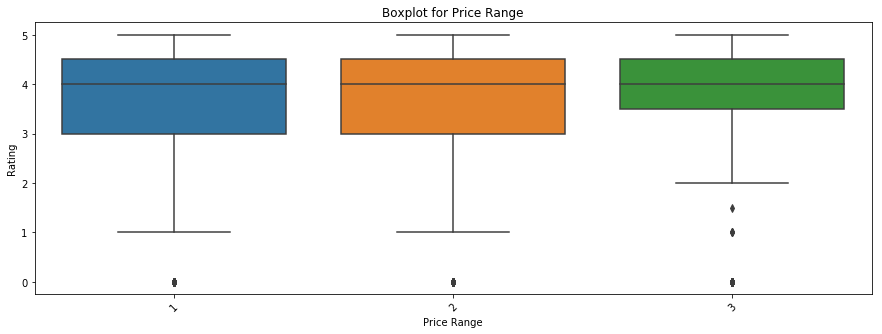

In [64]:
# Checking the Rating distribution by price range. от Акбара
fig, ax = plt.subplots(figsize = (15, 5))

sns.boxplot(x='Price Range', y='Rating',data=data.loc[
    data.loc[:, 'Price Range'].isin(data.loc[:, 'Price Range'].value_counts().index[:])
],ax=ax)

plt.xticks(rotation=45)
ax.set_title('Boxplot for Price Range')

plt.show()

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

# **Reviews**
Попробуем найти эпитеты, хорошие и не очень

In [65]:
# сначала удалим nan, заменим на значение [[], []]

data['Reviews'] = data['Reviews'].fillna('[[], []]')

In [66]:
# посмотрим на самые популярные слова в комментах

from collections import Counter
import re

def dict_words(df, column):
    count=Counter()
    pattern = re.compile('[a-zA-Z]+')
    for i in range(len(df)):
        word_set = pattern.findall(df.iloc[i][column])
        for j in word_set:
            count[j.lower()] += 1
    return(len(count), count.most_common(100))

display(dict_words(data, 'Reviews'))

(14630,
 [('food', 13166),
  ('good', 11780),
  ('great', 10628),
  ('and', 9765),
  ('a', 8331),
  ('in', 6216),
  ('the', 6187),
  ('nice', 5702),
  ('place', 5166),
  ('for', 4803),
  ('service', 4383),
  ('very', 4208),
  ('restaurant', 3632),
  ('best', 3411),
  ('excellent', 3261),
  ('to', 2927),
  ('of', 2710),
  ('lunch', 2694),
  ('but', 2559),
  ('with', 2534),
  ('delicious', 2164),
  ('not', 2102),
  ('friendly', 1917),
  ('pizza', 1787),
  ('lovely', 1782),
  ('amazing', 1771),
  ('tasty', 1681),
  ('dinner', 1584),
  ('italian', 1378),
  ('it', 1344),
  ('little', 1300),
  ('bar', 1298),
  ('atmosphere', 1284),
  ('at', 1236),
  ('staff', 1233),
  ('meal', 1171),
  ('breakfast', 1127),
  ('experience', 1110),
  ('local', 1068),
  ('value', 1058),
  ('i', 1028),
  ('you', 994),
  ('is', 985),
  ('coffee', 980),
  ('fantastic', 967),
  ('authentic', 946),
  ('average', 934),
  ('quick', 904),
  ('quality', 903),
  ('s', 894),
  ('on', 888),
  ('price', 883),
  ('perfect', 

In [67]:
# тут ваш код на обработку других признаков
# .....

# создадим список с хорошими словами, выбрав эпитеты визуально
good_words = [
    'good',
    'great',
    'nice',
    'best',
    'excellent',
    'friendly',
    'amazing',
    'tasty',
    'experience',
    'authentic',
    'fantastic',
    'perfect',
    'quick',
    'quality',
    'wonderful',
    'cozy',
    'better',
    'not bad'
]

# и с плохими словами
so_so_words = list(map(lambda epithet: "not so " + epithet, good_words)) +['not recommended', 'bad bad', ', bad', '. bad', '\'bad']
display(so_so_words)
# тут мы отбросим бэды это для поиска хороших слов
bad_words = list(map(lambda epithet: "not so " + epithet, good_words))
display(bad_words)

['not so good',
 'not so great',
 'not so nice',
 'not so best',
 'not so excellent',
 'not so friendly',
 'not so amazing',
 'not so tasty',
 'not so experience',
 'not so authentic',
 'not so fantastic',
 'not so perfect',
 'not so quick',
 'not so quality',
 'not so wonderful',
 'not so cozy',
 'not so better',
 'not so not bad',
 'not recommended',
 'bad bad',
 ', bad',
 '. bad',
 "'bad"]

['not so good',
 'not so great',
 'not so nice',
 'not so best',
 'not so excellent',
 'not so friendly',
 'not so amazing',
 'not so tasty',
 'not so experience',
 'not so authentic',
 'not so fantastic',
 'not so perfect',
 'not so quick',
 'not so quality',
 'not so wonderful',
 'not so cozy',
 'not so better',
 'not so not bad']

In [68]:
# поставим единички у так себе отзывов
def find_bad_words(cell):
    count=0
    for word in so_so_words:
        if word in cell.lower():
            count+=1
    if count > 0:
        return 1
    else:
        return 0

data['so_so_words'] = data['Reviews'].apply(find_bad_words)

In [69]:
data[data.so_so_words==1][['Reviews', 'so_so_words']]

,Reviews,so_so_words
41,"[['Worst experience ever!!', 'Bad everything']...",1
493,"[['Not recommended', 'Not good at all'], ['12/...",1
511,"[['Delicious pastries, not so nice interior'],...",1
601,"[['Good food, not so good waitress', 'Great lo...",1
650,"[['Bad quality/price ratio'], ['02/23/2015']]",1
...,...,...
49650,"[['Avoid this restaurant', 'Bad food, rude sta...",1
49803,"[['Not worth visiting', 'Bad feeling'], ['10/3...",1
49887,"[['Nice service', 'Bad Food, Bad Price'], ['07...",1
49912,"[['not recommended', 'Below Average'], ['05/23...",1


по сути результат ни о чем...

In [70]:
def find_good_words(cell):
    count=0
    for word in bad_words:
        if (word not in cell.lower()) and (word.replace('not so ', '') in cell.lower()):
            count+=1
    if count > 0:
        return 1
    else:
        return 0
data['good_words'] = data['Reviews'].apply(find_good_words)

In [71]:
data[data.good_words==1][['Reviews', 'good_words']]

,Reviews,good_words
1,"[['Very good reviews!', 'Fine dining in Hakani...",1
2,"[['Better than the Links', 'Ivy Black'], ['12/...",1
3,"[['Most exquisite', 'Delicious and authentic']...",1
4,"[['Always the best in bratislava', 'Very good ...",1
5,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",1
...,...,...
49993,"[['Naught but VERY nice', 'Yum'], ['01/23/2017...",1
49995,"[['The real Italian experience!', 'Wonderful f...",1
49996,"[['Parisian atmosphere', 'Bit pricey but inter...",1
49997,"[['Good by swedish standards', 'A hidden jewel...",1


In [72]:
# теперь добавим разницу в дате отзывов у ресторана, если строка пропущена, ставим ноль
# надо сказать, НИКАК не повлияло на результат
import re
from datetime import datetime, timedelta
pattern = re.compile('\d\d/\d\d/\d\d\d\d')

def diff_rev_data(cell):
    data_set = pattern.findall(cell)
#     оказалось, кое где одна дата, поэтому проверяем длину списка
    if len(data_set) == 2:
        data1 = datetime.strptime(data_set[0], '%m/%d/%Y')
        data2 = datetime.strptime(data_set[1], '%m/%d/%Y')
        return (data1-data2).days
    else:
        return 0
    
data['diff_rev_data'] = data['Reviews'].apply(diff_rev_data)

In [73]:
# # был альтернативый из слака вариант
# food_data = data.copy()
# import ast
# food_data["Reviews"] = food_data["Reviews"].str.replace("nan", "' '")
# # remove 'nan' for prevent catboost fall with assertion
# food_data["Reviews"].fillna("[[], []]", inplace=True)
# food_data["Reviews"] = food_data["Reviews"].apply(
#     lambda x: ast.literal_eval(x)
# )
# # convert text to date
# food_data["Reviews Dates"] = food_data["Reviews"].apply(
#     lambda x: [datetime.strptime(d, "%m/%d/%Y") for d in x[1]]
# )
# # Check if dates in list in right order and reordering if order is wrong
# food_data["Reviews Dates"] = food_data["Reviews Dates"].apply(
#     lambda x: [x[i] for i in [1, 0]] if ((len(x) > 1) and (x[1] > x[0])) else x
# )
# # Add diffs between first and last review to dataset
# food_data["Reviews Dates Diff"] = food_data["Reviews Dates"].apply(
#     lambda x: (x[0] - x[1]).days if len(x) > 1 else 0
# )

In [74]:
# добавим колонку, где разделим разницу в датах между отзывами на количество отзывов 555
data['diff_dataRev_kolRev'] = data['diff_rev_data']/data['Number of Reviews']

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 86 columns):
Restaurant_id               50000 non-null object
Cuisine Style               50000 non-null int64
Ranking                     50000 non-null float64
Price Range                 50000 non-null int64
Number of Reviews           50000 non-null float64
Reviews                     50000 non-null object
URL_TA                      50000 non-null object
ID_TA                       50000 non-null object
sample                      50000 non-null int64
Rating                      50000 non-null float64
Number_of_Reviews_isNAN     50000 non-null uint8
Reviews to Ranking Ratio    50000 non-null float64
city_id                     50000 non-null int64
city_area                   50000 non-null int64
city_popul                  50000 non-null int64
city_climate                50000 non-null int64
city_tourism                50000 non-null float64
rank_div_count_city         50000 non-null f

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

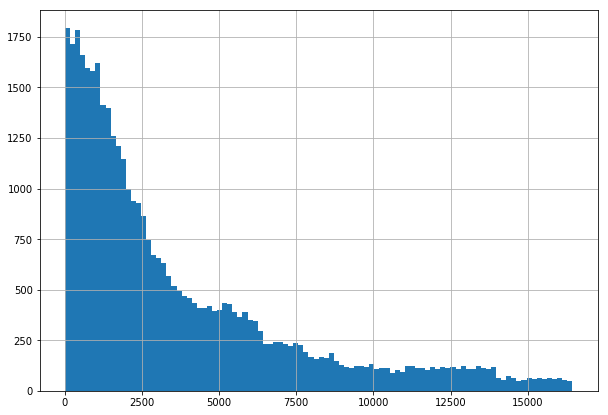

In [76]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

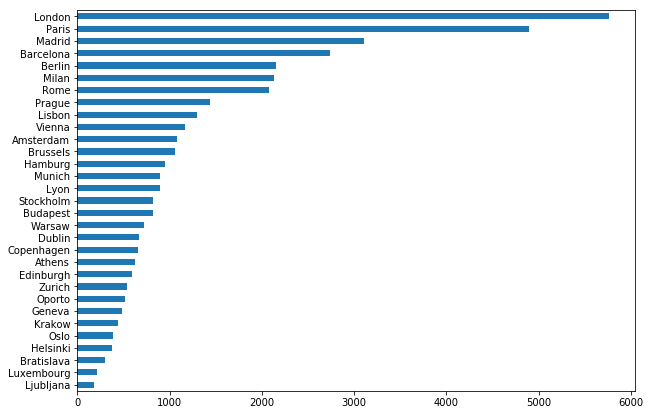

In [77]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

In [78]:
# # Проверка распределения рейтинга по городам. Взято у Акбара

# У меня City уже удалился!!!

# fig, ax = plt.subplots(figsize = (15, 5))

# sns.boxplot(x='City', y='Rating',data=data.loc[
#     data.loc[:, 'City'].isin(data.loc[:, 'City'].value_counts().index[:])
# ],ax=ax)

# plt.xticks(rotation=45)
# ax.set_title('Boxplot for City')

# plt.show()

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

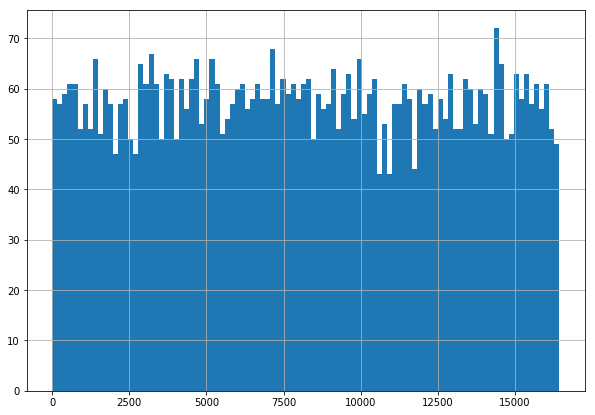

In [79]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

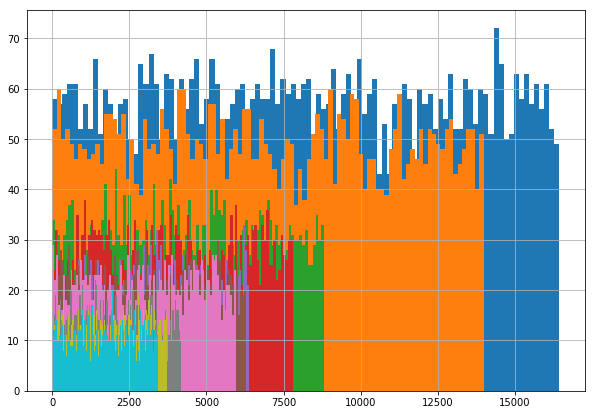

In [80]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


# Ranking

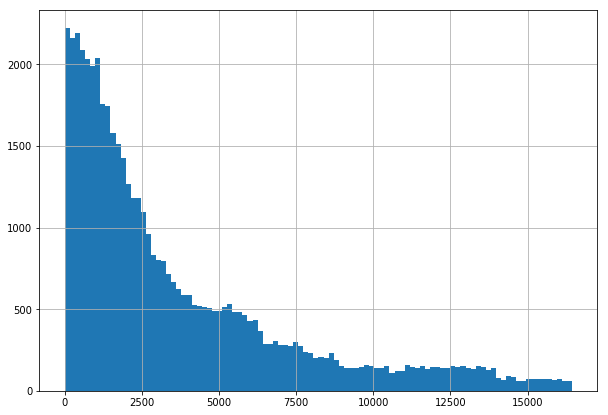

In [81]:
# добавки от Акбара
# Checking the Ranking distribution.
data['Ranking'].hist(bins=100)

In [82]:

# Creating a new feature. Не знаю, чего он дает этот признак
data['Relative Ranking'] = data['Ranking'] / data['Restaurants Count']
data['Relative Ranking']

0        0.736827
1        0.063817
2        0.360320
3        0.074622
4        0.027799
           ...   
49995    0.062972
49996    0.360427
49997    0.527627
49998    0.199688
49999    0.607935
Name: Relative Ranking, Length: 50000, dtype: float64

In [83]:
# и добавим деление рэнкинга на количество кухонь
# data['rank_div_cus_count'] = data['Ranking'] / data['Cuisine Style']

# ничего не дало

### Посмотрим распределение целевой переменной

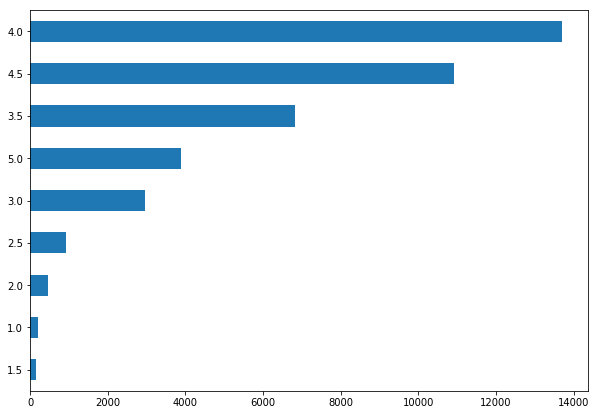

In [84]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

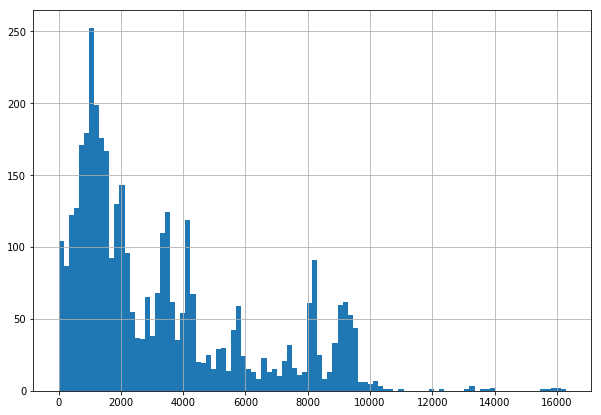

In [85]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

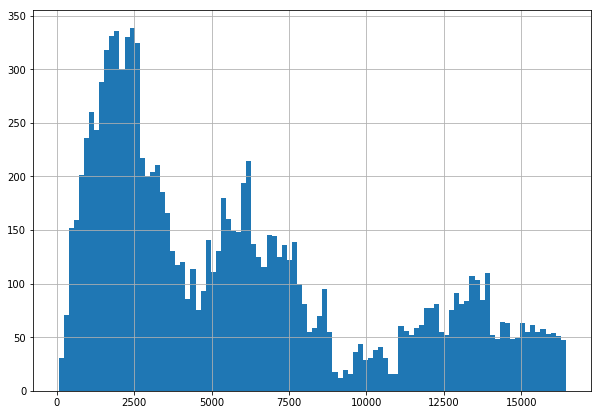

In [86]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

Я ВИЖУ СВЯЗЬ РЭНКИНГА С ПЛОЩАДЬЮ И НАСЕЛЕНИЕМ, И ЧТО???

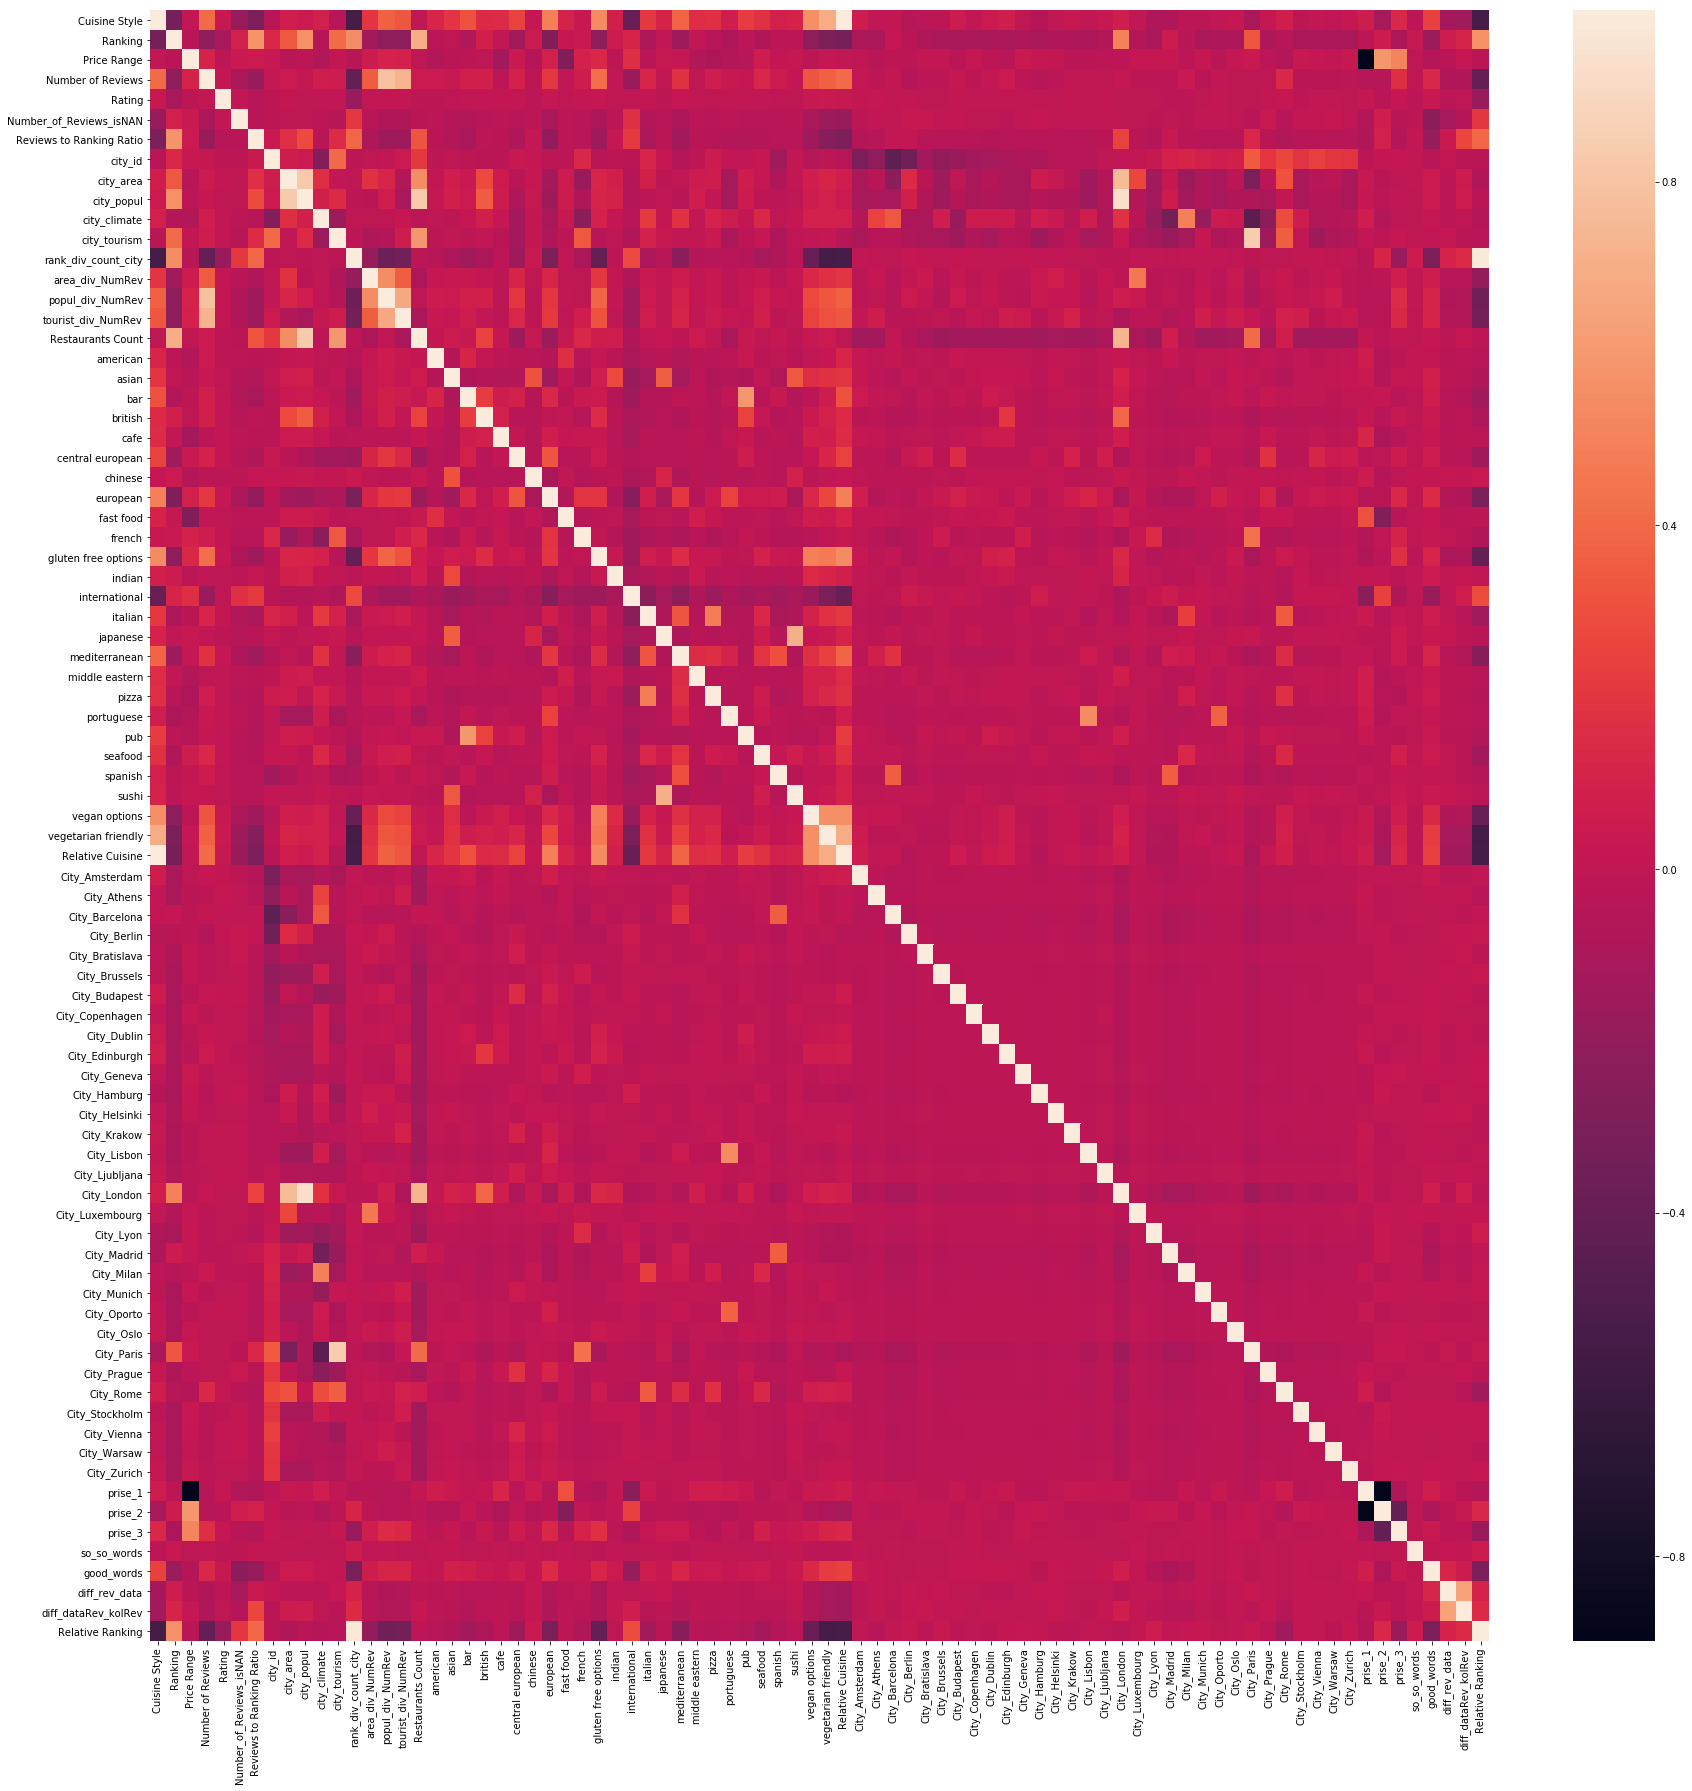

In [87]:
#plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.figsize'] = (30,30)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

In [88]:
# вот тоже матрица корреляций

# def plot_corr(df,size=50):
#     '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

#     Input:
#         df: pandas DataFrame
#         size: vertical and horizontal size of the plot'''

#     corr = df.corr()
#     fig, ax = plt.subplots(figsize=(size, size))
#     ax.matshow(corr)
#     plt.xticks(range(len(corr.columns)), corr.columns);
#     plt.yticks(range(len(corr.columns)), corr.columns);
    
# plot_corr(data)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [89]:
# # на всякий случай, заново подгружаем данные
# df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
# df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
# df_train['sample'] = 1 # помечаем где у нас трейн
# df_test['sample'] = 0 # помечаем где у нас тест
# df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

# data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
# data.info()

In [90]:
# функцию надо бы заполнить, но времени уже нет((

# def preproc_data(df_input):
#     '''includes several functions to pre-process the predictor data.'''
    
#     df_output = df_input.copy()
    
#     # ################### 1. Предобработка ############################################################## 
#     # убираем не нужные для модели признаки
#     df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
#     # ################### 2. NAN ############################################################## 
#     # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
#     df_output['Number of Reviews'].fillna(0, inplace=True)
#     # тут ваш код по обработке NAN
#     # ....
    
    
#     # ################### 3. Encoding ############################################################## 
#     # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#     df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
#     # тут ваш код не Encoding фитчей
#     # ....
    
    
#     # ################### 4. Feature Engineering ####################################################
#     # тут ваш код не генерацию новых фитчей
#     # ....
    
    
#     # ################### 5. Clean #################################################### 
#     # убираем признаки которые еще не успели обработать, 
#     # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
#     object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
#     df_output.drop(object_columns, axis = 1, inplace=True)
    
#     return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [91]:
# df_preproc = preproc_data(data)
# df_preproc.sample(10)

In [92]:
data.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)

# data.drop(['Number_of_Reviews_isNAN', 'city_id', 'city_area', 'city_popul',
#        'city_climate', 'city_tourism', 'City_London','City_Paris'], axis = 1, inplace=True)


object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [93]:
# удаляем все, кроме 
# data = data[['Ranking', 'rank_div_count_city', 'sample', 'Number of Reviews', 'Rating']]

# с такой фигней результат стал 0,22 чот там, так что не удаляем))

In [94]:
df_preproc = data.copy()

In [95]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 83 columns):
Cuisine Style               50000 non-null int64
Ranking                     50000 non-null float64
Price Range                 50000 non-null int64
Number of Reviews           50000 non-null float64
sample                      50000 non-null int64
Rating                      50000 non-null float64
Number_of_Reviews_isNAN     50000 non-null uint8
Reviews to Ranking Ratio    50000 non-null float64
city_id                     50000 non-null int64
city_area                   50000 non-null int64
city_popul                  50000 non-null int64
city_climate                50000 non-null int64
city_tourism                50000 non-null float64
rank_div_count_city         50000 non-null float64
area_div_NumRev             50000 non-null float64
popul_div_NumRev            50000 non-null float64
tourist_div_NumRev          50000 non-null float64
Restaurants Count           50000 non-nu

In [96]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [97]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [98]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 82), (40000, 82), (40000, 81), (32000, 81), (8000, 81))

In [99]:
# Нормализация ухудшила модель до 0,25

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# test_data = scaler.fit_transform(test_data)
# train_data = scaler.fit_transform(train_data)
# X = scaler.fit_transform(X)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# Model 
Сам ML

In [100]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [101]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [102]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [103]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.2038475


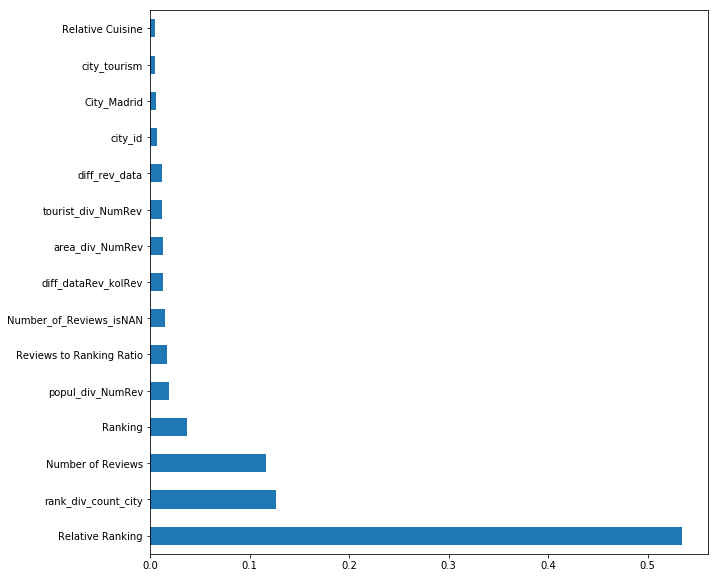

In [104]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [105]:
test_data.sample(10)

,Cuisine Style,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,Reviews to Ranking Ratio,city_id,city_area,city_popul,...,City_Warsaw,City_Zurich,prise_1,prise_2,prise_3,so_so_words,good_words,diff_rev_data,diff_dataRev_kolRev,Relative Ranking
6278,3,12914.0,2,178.0,0.0,0,72.550562,17,1572,8908,...,0,0,0,1,0,0,0,58,0.325843,0.577394
2212,1,11283.0,2,8.0,0.0,0,1410.375000,17,1572,8908,...,0,0,0,1,0,0,1,45,5.625000,0.504471
6906,3,3359.0,1,119.0,0.0,0,28.226891,27,1287,2871,...,0,0,1,0,0,0,0,32,0.268908,0.277925
1705,2,7772.0,2,78.0,0.0,0,99.641026,25,105,2148,...,0,0,0,1,0,0,1,324,4.153846,0.441767
6696,4,1949.0,2,569.0,0.0,0,3.425308,17,1572,8908,...,0,0,0,1,0,0,0,14,0.024605,0.087141
8352,2,1320.0,2,9.0,0.0,0,146.666667,28,188,962,...,0,0,0,1,0,0,1,6,0.666667,0.421591
4461,3,1829.0,2,340.0,0.0,0,5.379412,21,182,1379,...,0,0,0,1,0,0,1,10,0.029412,0.230353
2348,2,3046.0,2,18.0,0.0,0,169.222222,20,607,3266,...,0,0,0,1,0,0,1,0,0.000000,0.263449
4983,3,2792.0,2,77.0,0.0,0,36.259740,4,892,3645,...,0,0,0,1,0,0,1,-100,-1.298701,0.344266
9522,6,520.0,2,95.0,0.0,0,5.473684,23,42,238,...,0,0,0,1,0,0,0,-82,-0.863158,0.252427


In [106]:
test_data = test_data.drop(['Rating'], axis=1)

In [107]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [108]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [109]:
import numpy
predict_submission = [float(numpy.round(x*2)/2) for x in predict_submission]

In [110]:
predict_submission

[3.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 3.0,
 2.0,
 4.5,
 4.5,
 4.0,
 3.5,
 4.0,
 4.0,
 3.5,
 3.0,
 3.5,
 4.0,
 2.5,
 4.0,
 4.0,
 4.5,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 3.5,
 3.5,
 4.0,
 5.0,
 3.5,
 3.5,
 4.5,
 3.5,
 4.5,
 4.5,
 4.0,
 5.0,
 4.5,
 3.0,
 4.0,
 3.0,
 4.0,
 3.0,
 4.0,
 4.0,
 5.0,
 3.5,
 4.0,
 4.5,
 4.0,
 5.0,
 4.5,
 3.5,
 3.5,
 4.0,
 4.0,
 4.5,
 4.5,
 5.0,
 4.5,
 4.0,
 4.5,
 3.5,
 4.5,
 4.5,
 4.0,
 4.0,
 3.0,
 4.5,
 4.0,
 4.0,
 5.0,
 4.0,
 4.0,
 3.5,
 4.0,
 3.0,
 4.5,
 5.0,
 4.0,
 3.5,
 4.5,
 3.5,
 4.0,
 4.5,
 4.5,
 4.0,
 3.5,
 4.5,
 4.0,
 4.0,
 3.0,
 3.5,
 4.0,
 3.0,
 4.0,
 4.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.5,
 4.0,
 4.5,
 4.0,
 4.0,
 4.0,
 3.5,
 4.5,
 3.5,
 4.0,
 5.0,
 4.0,
 4.5,
 3.5,
 3.5,
 3.5,
 5.0,
 4.0,
 4.5,
 4.0,
 4.0,
 4.0,
 3.5,
 2.5,
 4.5,
 4.5,
 3.0,
 4.0,
 4.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 5.0,
 4.0,
 5.0,
 4.5,
 3.5,
 3.5,
 4.5,
 3.5,
 3.5,
 4.0,
 4.0,
 4.5,
 4.0,
 4.5,
 1.0,
 4.5,
 4.5,
 4.5,
 3.5,
 4.0,
 4.0,
 4.0,
 3.5,
 4.5,
 4.0,
 4.0,
 4.0,
 3.5

In [111]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,3.0
7,id_7,2.0
8,id_8,4.5
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
